### 특성(Feature)공학과 규제(Regularization : 정형화 , 규제 , 일반화)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

df = pd.read_csv('../Data/fish.csv')

In [4]:
# numpy 변환하기
import numpy as np

fish_full= df.to_numpy()
fish_full[0:6]

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32]])

In [5]:
df = pd.read_csv('../Data/fish_weight.csv')
df.head()

,weight
0,5.9
1,32.0
2,40.0
3,51.5
4,70.0


In [6]:
fish_weight = df.to_numpy()

In [7]:
# Train, Test
from sklearn.model_selection import train_test_split

In [8]:
train_input , test_input , train_target, test_target = \
    train_test_split(fish_full,fish_weight,random_state=42)

### scikit learn 으로 다중회귀 분석 하기

In [9]:
from sklearn.preprocessing import PolynomialFeatures

---
### 다항 특성 만들기 연습

In [10]:
poly = PolynomialFeatures(degree=3)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]


1 : 절편 , 2: $x$ , 3: $y$ , 4 : $x^2$ , 5 : $x * y$ 6 : $y^2$

In [11]:
# 절편이 필요 없는 경우
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [12]:
# train input을 다항 특성 만들기
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly=poly.transform(train_input)

In [13]:
train_poly[0:5]

array([[  19.6   ,    5.14  ,    3.04  ,  384.16  ,  100.744 ,   59.584 ,
          26.4196,   15.6256,    9.2416],
       [  22.    ,    5.88  ,    3.52  ,  484.    ,  129.36  ,   77.44  ,
          34.5744,   20.6976,   12.3904],
       [  18.7   ,    5.2   ,    3.12  ,  349.69  ,   97.24  ,   58.344 ,
          27.04  ,   16.224 ,    9.7344],
       [  17.4   ,    4.59  ,    2.94  ,  302.76  ,   79.866 ,   51.156 ,
          21.0681,   13.4946,    8.6436],
       [  36.    ,   10.61  ,    6.74  , 1296.    ,  381.96  ,  242.64  ,
         112.5721,   71.5114,   45.4276]])

In [14]:
# 컬럼 정보 확인
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [15]:
# test_input을 다항 특성으로 만들기 : fit 하면 안된다 -> train_input이 사라진다. 
test_poly = poly.transform(test_input)

---
### 다중 회귀 모델 훈련하기

In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
print('---'*10 , '특성공학 전','---'*10)
lr.fit(train_input,train_target)
print('train score : ',lr.score(train_input, train_target))
print('test score : ',lr.score(test_input, test_target))

print('---'*10 , '특성공학 후','---'*10)
lr.fit(train_poly,train_target)
print('train score : ',lr.score(train_poly, train_target))
print('test score : ',lr.score(test_poly, test_target))



------------------------------ 특성공학 전 ------------------------------
train score :  0.9559326821885706
test score :  0.8796419177546367
------------------------------ 특성공학 후 ------------------------------
train score :  0.9903183436982125
test score :  0.9714559911594168


---
### 더 많은 특성 만들기

In [17]:
poly = PolynomialFeatures(degree = 5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [18]:
print('---'*10 , '특성공학 전','---'*10)
lr.fit(train_input,train_target)
print('train score : ',lr.score(train_input, train_target))
print('test score : ',lr.score(test_input, test_target))

print('---'*10 , '특성공학 후','---'*10)
lr.fit(train_poly,train_target)
print('train score : ',lr.score(train_poly, train_target))
print('test score : ',lr.score(test_poly, test_target))

------------------------------ 특성공학 전 ------------------------------
train score :  0.9559326821885706
test score :  0.8796419177546367
------------------------------ 특성공학 후 ------------------------------
train score :  0.9999999999989608
test score :  -144.40490464808016


### 규제 전에 표준화
- 표준화를 통해 과대적합을 피할 수 있다. 
- 그 후에 규제 적용

In [19]:
# z-score 사용해서 표준화 하기
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

---
### 규제 
#### Ridge(L2 규제) 회귀
: 가중치의 제곱으로 규제하는 방법

In [20]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print('train score : ',ridge.score(train_scaled, train_target))
print('test score : ',ridge.score(test_scaled, test_target))


train score :  0.9896101671037343
test score :  0.9790693977615388


### 적절한 규제 강도(Hyper parameter) 찾기

In [21]:
train_score = []
test_score = []

alpha_list = [0.001 , 0.01 , 0.1, 1, 10 ,100 , 1000]

for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

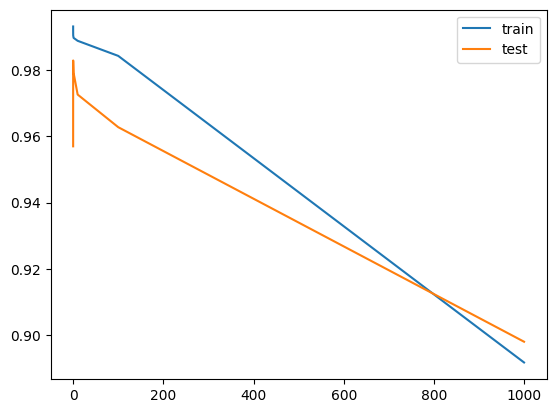

In [22]:
# 시각화 하기
import matplotlib.pyplot as plt

plt.plot(
    alpha_list,
    train_score,
    label='train'
)

plt.plot(
    alpha_list,
    test_score,
    label='test'
)

plt.legend()

plt.show()

> y축의 데이터 범위가 너무 커서 소수인 겨우에는 확인 할 수 없다. log를 취해서 범위를 줄이자

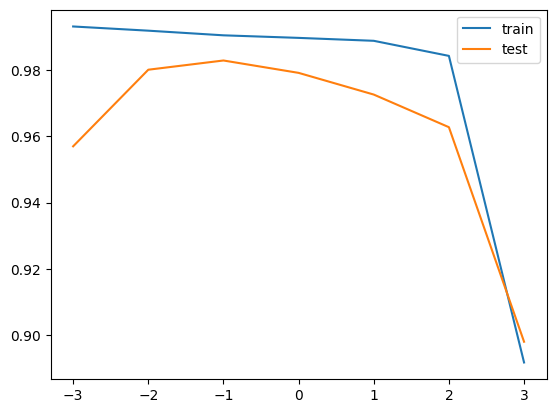

In [23]:
# log로 간격 줄이기
plt.plot(
    np.log10(alpha_list),
    train_score,
    label='train'
)

plt.plot(
    np.log10(alpha_list),
    test_score,
    label='test'
)

plt.legend()

plt.show()

### alpha가 0.1인 경우가 train과 test가 제일 가깝다 : 골디락스(Goldilocks) 포인트 라고 한다.

In [24]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print('train score : ',ridge.score(train_scaled, train_target))
print('test score : ',ridge.score(test_scaled, test_target))

train score :  0.9903815817570366
test score :  0.9827976465386955


---
### L1규제(Lasso) 규제
: 가중치의 절대값으로 규제하는 방법

In [25]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print('train score : ',lasso.score(train_scaled, train_target))
print('test score : ',lasso.score(test_scaled, test_target))

train score :  0.989789897208096
test score :  0.9800593698421884


In [26]:
# 최적값 찾기
train_score = []
test_score = []

alpha_list = [0.001 , 0.01 , 0.1, 1, 10 ,100, 1000]

for alpha in alpha_list:
    lasso = Lasso(alpha=alpha)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

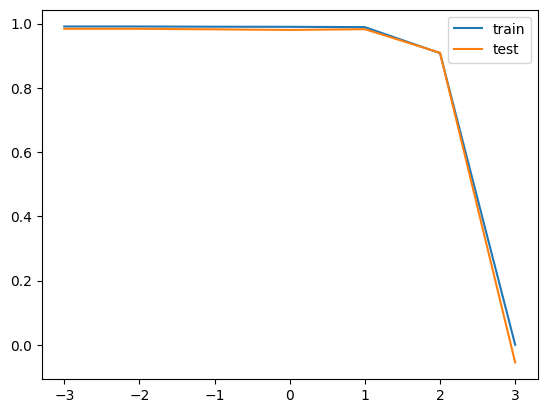

In [27]:
# log로 간격 줄이기
plt.plot(
    np.log10(alpha_list),
    train_score,
    label='train'
)

plt.plot(
    np.log10(alpha_list),
    test_score,
    label='test'
)

plt.legend()

plt.show()

> lasso인 경우에 기울기(가중치 : weight)를 0으로 변경하는 경우가 발생한다. 

In [28]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print('train score : ',lasso.score(train_scaled, train_target))
print('test score : ',lasso.score(test_scaled, test_target))

train score :  0.9888067471131867
test score :  0.9824470598706695


In [29]:
np.sum(lasso.coef_ == 0)

40